En este ejemplo, calculamos y graficamos el potencial para un sistema formado por un alambre cargado, con densidad de carga uniforme, frente a una esfera de radio $a=1$. El potencial es calculado utilizando el método de las imágenes. Este prescribe que el potencial generado por un elemento de carga $dq$ localizado en $\vec{r}_s$, y por la carga que este induce sobre la esfera es de la forma
$$
dV = \frac{dq}{4\pi \varepsilon_0}\left(\frac{1}{|\vec{r}-\vec{r}_s|}-\frac{\frac{a}{|\vec{r}_s|}}{\left|\vec{r}-\frac{a^2}{ |\vec{r}_s|}\vec{r}_s\right|}\right)
$$

Para el caso del alambre, ubicando el origen en el centro de la esfera, y el alambre en el plano $x,z$, y el eje $z$ paralelo al alambre, parametrizamos a la posición de la fuente con el ángulo $\chi$ que forma 
la posición del elemento de carga con el plano xy. De esta manera,
$$
\vec{r}_{s}(\chi)= b \check{e}_x + b \tan(\chi) \check{e}_z  
$$

El diferencial de carga queda parametrizado como
$$
dq = \lambda \left|\frac{d \vec{r}_{s}}{d \chi}\right|=\frac{\lambda b d\chi }{\cos^2(\chi)}
$$

y la posición de la carga imágen por

$$
\vec{r}_{i}(\phi)=  \frac{a^2}{|\vec{r}_{s}(\chi)|^2}\vec{r}_{s}(\chi)= 
a^2/b  (1+\cos(2\chi))\check{e}_x + a^2/b  (\sin(2\chi))\check{e}_z 
$$

El potencial se expresa entonces como
$$
V(\vec{r})=\int dV = \int_{\chi_{min}}^{\chi_{max}} \frac{\lambda d\chi}{4\pi \varepsilon_0 \cos^2(\chi)}\left(\frac{b}{|\vec{r}-\vec{r}_s(\chi)|}-\frac{a \cos(\chi)}{\left|\vec{r}-\vec{r}_i(\chi)\right|}\right)
$$

A partir de este potencial, podemos calcular el campo eléctrico vía $\vec{E}(\vec{r})=-\nabla V(\vec{r})$.
La densidad de carga inducida se obtiene evaluando la componente normal de este gradiente sobre la superficie de la frontera:

$$
\sigma(\check{r}) = -\varepsilon_0 \check{r}\cdot \nabla V(a\check{r})
$$

$$
\sigma(\check{r})=\frac{\lambda a}{4\pi}\int  \frac{d\chi}{\cos^2(\chi)}\left(b\frac{1 - \check{r}\cdot \vec{r}_s(\chi)}{|a\check{r}-\vec{r}_s(\chi)|^3}-  a \cos(\chi) \frac{1 - \check{r}\cdot \vec{r}_i(\chi)}{|a\check{r}-\vec{r}_i(\chi)|^3}\right)
$$


Si bien no hay una expresión cerrada para las integrales que definen a $V(\vec{r})$ y $\sigma(\check{r})$, podemos evaluarlas numéricamente en forma simple.

Por otro lado, para obtener una aproximación analítica a estas expresiones, podemos estudiar la distribución de carga imágen como una expansión en multipolos. 

El término monopolar se corresponderá con la integral de $\sigma$ sobre la superficie de la esfera, y viene dada por
\begin{eqnarray}
Q&=&-\int_{-\arctan(L/(2b))}^{\arctan(L/(2b))} \frac{\lambda b d\chi}{\cos^2(\chi) |\vec{r}_s/a|}\\
&=&-\lambda a \int_{-\arctan(L/(2b))}^{\arctan(L/(2b))} \frac{d\chi}{\cos(\chi)}  \\&=&
-\lambda a\, \left.
\ln(\tan(\chi)+\sec({\chi}))
\right|_{-\arctan(L/(2b))}^{\arctan(L/(2b))} \\
&=&
-\lambda a\, 
\ln(\frac{\sqrt{1+(2b/L)^{2}}+1}{\sqrt{1+(2b/L)^{2}}-1})
\end{eqnarray}

Por otro lado, el momento dipolar referido al centro de la esfera, debido a la simetría, tendrá solamente componente en la dirección paralela al eje $x$:

\begin{eqnarray}
\vec{p} &=& -\int_{-\arctan(L/(2b))}^{\arctan(L/(2b))} \frac{\vec{r}_i  b \lambda d\chi}{\cos^2(\chi) |\vec{r}_s/a|}\\
&=&
-\lambda \frac{a^3}{b}  \int_{-\arctan(L/(2b))}^{\arctan(L/(2b))} \frac{(1+\cos(2\chi))d\chi}{2\cos(\chi)} \check{e}_x\\
&=&
-\lambda \frac{a^3}{b}  \int_{-\arctan(L/(2b))}^{\arctan(L/(2b))}\cos(\chi)d\chi \check{e}_x\\
&=&2\lambda \frac{a^3}{b}
-\sin(\arctan(L/(2b)))\check{e}_x=  -\frac{2\lambda a^3}{b \sqrt{1+(2b/L)^2}}\check{e}_x
\end{eqnarray}


Podemos entonces obtener una aproximación al resultado completo remplazando la distribución de cargas imágenes por una única carga imágen de valor $Q$, localizada en $\vec{r}_{I}=\frac{\vec{p}}{Q}=\frac{2 a^2}{b \sqrt{1+(2b/L)^2} \ln(\frac{\sqrt{1+(2b/L)^{2}}+1}{\sqrt{1+(2b/L)^{2}}-1})}\check{e}_x$.

En el límite $L\rightarrow \infty$, la carga neta $Q$ se vuelve divergente. Sin embargo, podemos modificar la distribución de carga agregando una carga $Q'$ en el origen, de manera de fijar el potencial sobre la superficie a un valor finito, relativo a un referencial localizado a una distancia finita. Esta modificación al problema no tiene efecto sobre el momento dipolar inducido $\vec{p}$.



# Código para calcular y graficar el potencial y la distribución de carga inducida

In [189]:
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm, colors
import matplotlib.pyplot as plt
import scipy.integrate as scpint


def posfuente(b, phi):
    """
    Posición de un elemento de carga, sobre un alambre a una distancia b del centro
    de la esfera, para un ángulo phi.
    """
    if type(phi) is np.ndarray:
        return np.array([[b,b*np.tan(x)] for x in phi])
    else:
        return np.array([b,b*np.tan(phi)])


def posimagen(b, phi):
    """
    Posición de un elemento de carga imágen, correspondiente 
    a la fuente sobre un alambre a una distancia b del centro
    de la esfera, para un ángulo phi.
    """
    if type(phi) is np.ndarray:
        return np.array([[.5+.5*np.cos(2.*x),.5*np.sin(2*x)] for x in phi])/b
    else:
        return np.array([.5+.5*np.cos(2.*phi),.5*np.sin(2*phi)])/b

    
def elempotencial(phi,b,x,z):
    """
    Contribución al potencial en el punto (x,0,z) proveniente
    del segmento de alambre en la dirección phi, y de su correspondiente
    imágen.
    """
    
    r = posfuente(b,phi)
    r1 = np.sqrt((r[0]-x)**2+(r[1]-z)**2)
    r = np.sqrt(r[0]**2+r[1]**2)
    r2 = posimagen(b,phi)
    r2 = np.sqrt((r2[0]-x)**2+(r2[1]-z)**2)
    # Nótese el factor global $1/cos(chi)^2$ correspondiente al diferencial de carga fuente.    
    return  b*(1/r1-1/(r*r2))/np.cos(phi)**2


def elemsigma(chi,b,theta,phi):
    """
    Contribución a la densidad de carga superficial sobre la superficie de la esfera,
    en el punto con coordenadas theta,phi
    proveniente del segmento de alambre en la dirección chi, y de su correspondiente
    imágen.
    """
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    r = posfuente(b,chi)
    r1 = np.sqrt((r[0]-x)**2+(r[1]-z)**2+y**2)
    # n1= r \cdot \nabla |\vec{r}-\vec{r}_{im}|^2
    n1 = 1. - 2. *(r[0]*x+r[1]*z)
    r = np.sqrt(r[0]**2+r[1]**2)
    r2 = posimagen(b,chi)
    # n2= r \cdot \nabla |\vec{r}-\vec{r}_{im}|^2
    n2 = 1. - 2. * (r2[0]*x+r2[1]*z)
    r2 = np.sqrt((r2[0]-x)**2+(r2[1]-z)**2 + y**2)
    # Nótese el factor global $1/cos(chi)^2$ correspondiente al diferencial de carga fuente.
    return  b*(n1/r1**3-n2/(r*r2**3))/np.cos(chi)**2


def potencial(b,x,z):
    """
    Potencial sobre el punto (x,0,z) generado por el alambre y por la 
    carga inducida sobre la esfera.
    """    
    if x**2+z**2<1:
        return 0.
    phis = np.linspace(-1.,1.,100)
    return sum([.01*elempotencial(phi,b,x,z) for phi in phis])
    #return scpint.quad(elempotencial,-1.3,1.3,args=(b,x,z))[0]

    
def sigma(b,theta,phi):
    """
    Densidad de carga superficial sobre la superficie de la esfera,
    en el punto con coordenadas theta,phi inducida por el alambre.
    """
    phis = np.linspace(-1.,1.,100)
    return sum([.01*elemsigma(chi,b,theta,phi) for chi in phis])
    #return scpint.quad(elempotencial,-1.3,1.3,args=(b,x,z))[0]

    

phis=np.linspace(-1.,1.,100)

# Alambre a distancia grande. $b/a=8$

## Potencial en el plano que contiene al alambre y al centro de la esfera

(-10, 10)

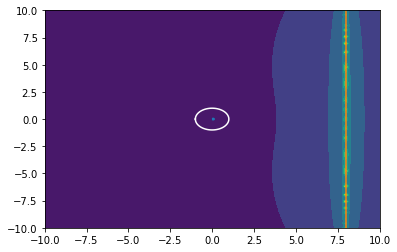

In [190]:
xs=np.linspace(-10,10,100)
zs=np.linspace(-10,10,100)
Xs,Zs=np.meshgrid(xs,xs)

U = np.array([[  potencial(8.,x,z) for x in xs] for z in zs])
cur=posimagen(8.,phis)
plt.plot(cur[:,0],cur[:,1])
cur=posfuente(8.,phis)
plt.plot(cur[:,0],cur[:,1])
plt.plot(np.cos(3.15*phis),np.sin(3.15*phis),c="white")
plt.contourf(Xs,Zs,U)
plt.xlim(-10,10)
plt.ylim(-10,10)

# Alambre a distancia intermedia. $b/a=2$

## Potencial en el plano que contiene al alambre y al centro de la esfera

(-3, 3)

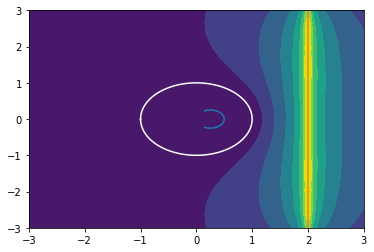

In [191]:
xs=np.linspace(-3,3,100)
zs=np.linspace(-3,3,100)
Xs,Zs=np.meshgrid(xs,xs)

U = np.array([[  potencial(2.,x,z) for x in xs] for z in zs])
cur=posimagen(2.,phis)
plt.plot(cur[:,0],cur[:,1])
cur=posfuente(2.,phis)
plt.plot(cur[:,0],cur[:,1])
plt.plot(np.cos(3.15*phis),np.sin(3.15*phis),c="white")
plt.contourf(Xs,Zs,U)
plt.xlim(-3,3)
plt.ylim(-3,3)

## Densidad superficial de carga

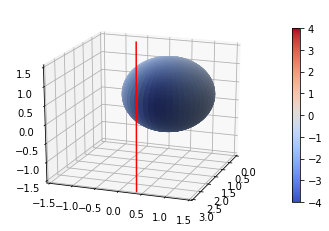

In [192]:
thetas = np.linspace(-.5*np.pi,.5*np.pi,100)
phis = np.linspace(-np.pi,np.pi,100)
Phis,Thetas=np.meshgrid(phis,thetas)

sigmas = np.array([[  sigma(2,theta+.5*np.pi,phi) for phi in phis] for theta in thetas])



m = cm.ScalarMappable(cmap=cm.coolwarm)
fig = plt.figure()
ax = fig.gca(projection='3d')
sur=ax.plot_surface(np.cos(Thetas)*np.cos(Phis),np.cos(Thetas)*np.sin(Phis),np.sin(Thetas),
                facecolors=cm.coolwarm(sigmas/8+.5),zorder=10)
m.set_array([-4.,4.])
fig.colorbar(m, shrink=0.8);
ax.view_init(20,20)
ax.set_xlim3d(0,3)
ax.set_ylim3d(-1.5,1.5)
ax.set_zlim3d(-1.5,1.5)

l=ax.plot(np.array([2,2]),np.array([0,0]),np.array([-2,2]),c="red",zorder=100)


# Alambre cercano $(b/a=1.2)$

## Potencial en el plano que contiene al alambre y al centro de la esfera

(-3, 3)

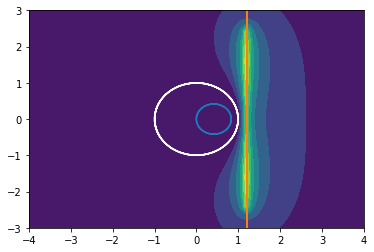

In [193]:
xs=np.linspace(-4,4,100)
zs=np.linspace(-3,3,100)
Xs,Zs=np.meshgrid(xs,xs)

U = np.array([[  potencial(1.2,x,z) for x in xs] for z in zs])
cur=posimagen(1.2,phis)
plt.plot(cur[:,0],cur[:,1])
cur=posfuente(1.2,phis)
plt.plot(cur[:,0],cur[:,1])
plt.plot(np.cos(3.15*phis),np.sin(3.15*phis),c="white")
plt.contourf(Xs,Zs,U)
plt.xlim(-4,4)
plt.ylim(-3,3)

## Densidad superficial de carga

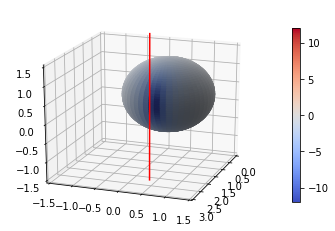

In [194]:
thetas = np.linspace(-.5*np.pi,.5*np.pi,100)
phis = np.linspace(-np.pi,np.pi,100)
Phis,Thetas=np.meshgrid(phis,thetas)

sigmas = np.array([[  sigma(1.2,theta+.5*np.pi,phi) for phi in phis] for theta in thetas])



m = cm.ScalarMappable(cmap=cm.coolwarm)
fig = plt.figure()
ax = fig.gca(projection='3d')
sur=ax.plot_surface(np.cos(Thetas)*np.cos(Phis),np.cos(Thetas)*np.sin(Phis),np.sin(Thetas),
                facecolors=cm.coolwarm(sigmas/24+.5),zorder=10)
m.set_array([-12.,12.])
fig.colorbar(m, shrink=0.8);
ax.view_init(20,20)
ax.set_xlim3d(0,3)
ax.set_ylim3d(-1.5,1.5)
ax.set_zlim3d(-1.5,1.5)

l=ax.plot(np.array([1.2,1.2]),np.array([0,0]),np.array([-2,2]),c="red",zorder=100)
